## 04. Self Oil Station Price Analysis

### 1. 셀레니움 설치
- conda install selenium
- pip install selenium (mac m1)
- chrome driver

```
- BeautifulSoup 만으로 해결할 수 없는 것
    - 접근할 웹 주소를 알 수 없을 때
    - 자바스크립트를 사용하는 웹페이지의 경우
    - 웹 브라우저로 접근하지 않으면 안될 때

- Selenium
파이썬으로 제어 가능한 웹 브라우저를 실행.
    - 웹 브라우저를 원격 조작하는 도구
    - 자동으로 url을 열고 클릭 등이 가능
    - 스크롤, 문자입력, 화면 캡쳐 등등
```

In [3]:
pip list | grep sele

Note: you may need to restart the kernel to use updated packages.


���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


In [4]:
from selenium import webdriver 

In [7]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://www.naver.com')

In [8]:
driver.quit()

## 2. 셀프 주유소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [1]:
from selenium import webdriver

In [12]:
# 페이지 접근
url = 'https://www.opinet.co.kr/searRgSelect.do'
driver = webdriver.Chrome('../driver/Chromedriver.exe')
driver.get(url)

In [ ]:
driver.get(url)

- 문제
    - 1. 해당 url로 한 번에 접근이 안됩니다.
    - 2. 메인 페이지로 접속이 되고, 팝업창이 하나 나옵니다.

In [13]:
# 팝업창 화면 전환 후 닫아주기
driver.switch_to_window(driver.window_handles[-1])

C:\Users\rkgnj\AppData\Local\Temp/ipykernel_9228/4118493799.py:2: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [6]:
# 접근 페이지 다시 요청

In [16]:
import time


def main_get():
    # 페이지 접근
    url = 'https://www.opinet.co.kr/searRgSelect.do'
    driver = webdriver.Chrome('../driver/Chromedriver.exe')
    driver.get(url)
    time.sleep(7)

    # 팝업창으로 전환
    driver.switch_to_window(driver.window_handles[-1])
    time.sleep(3)

    # 팝업창 닫기
    driver.close()
    time.sleep(3)

    # 메인화면 창으로 전환
    driver.switch_to_window(driver.window_handles[-1])

    # 접근 url 다시 요청
    driver.get(url)

C:\Users\rkgnj\AppData\Local\Temp/ipykernel_9228/3785062557.py:10: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])
C:\Users\rkgnj\AppData\Local\Temp/ipykernel_9228/3785062557.py:18: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [19]:
# 지역: 시/도

sido_list_raw = driver.find_element_by_id('SIDO_NM0')
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n              경기\n             \n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [21]:
sido_list = sido_list_raw.find_elements_by_tag_name('option')
len(sido_list), sido_list[1].text

(18, '서울')

In [23]:
sido_list[1].get_attribute('value')  # 속성값 가져오기

'서울특별시'

In [24]:
# sido_names = [option.get_attribute('value') for option in sido_list]

sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute('value'))

sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [25]:
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [27]:
# 시,도 키값 보내주기
sido_list_raw.send_keys(sido_names[0])

In [30]:
# 구

gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0') #부모 태그
gu_list = gu_list_raw.find_elements_by_tag_name('option') #자식 태그 (여러개 있기 때문에 s)

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5]


['강남구', '강동구', '강북구', '강서구', '관악구']

In [31]:
# 구 키값 보내주기
gu_list_raw.send_keys(gu_names[15])

In [ ]:
# 엑셀 저장

driver.find_element_by_css_selector('#glopopd_excel').click()
# driver.find_element_by_id('glopopd_excel').click()
# diver.find_element_by_xpath('//*[@id="glopopd_excel"]')

In [32]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(7)

    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(5)
    


C:\Users\rkgnj\AppData\Local\Temp/ipykernel_9228/2240889253.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [33]:
driver.close()

## 4. 데이터 정리하기

In [34]:
import pandas as pd
from glob import glob

In [35]:
# 파일 목록 한 번에 가져오기
glob('../data/지역_*.xls')

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [36]:
# 파일명 저장
stations_files = glob('../data/지역_*.xls')
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [42]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2)  #컬럼 이상하게 가져와졌을 때
tmp.head(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1658,1458,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-


In [43]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [44]:
tmp_raw

[       지역                    상호                            주소      상표  \
 0   서울특별시  재건에너지 재정제2주유소 고속셀프지점  서울특별시 강동구  천호대로 1246 (둔촌제2동)  현대오일뱅크   
 1   서울특별시                구천면주유소         서울 강동구 구천면로 357 (암사동)  현대오일뱅크   
 2   서울특별시     현대오일뱅크㈜직영 명일셀프주유소          서울 강동구 고덕로 168 (명일동)  현대오일뱅크   
 3   서울특별시               방아다리주유소          서울 강동구 동남로 811 (명일동)   SK에너지   
 4   서울특별시       대성석유(주)직영 길동주유소              서울 강동구 천호대로 1168   GS칼텍스   
 5   서울특별시        지에스칼텍스㈜ 동서울주유소        서울 강동구 천호대로 1456 (상일동)   GS칼텍스   
 6   서울특별시      주)지유에너지직영 오렌지주유소          서울 강동구 성안로 102 (성내동)   SK에너지   
 7   서울특별시        (주)삼표에너지 고덕주유소           서울 강동구 고덕로 39 (암사동)   GS칼텍스   
 8   서울특별시              sk해뜨는주유소         서울 강동구  상일로 132 (강일동)   SK에너지   
 9   서울특별시     현대오일뱅크㈜직영 암사셀프주유소         서울 강동구 올림픽로 749 (암사동)  현대오일뱅크   
 10  서울특별시         지에스칼텍스㈜ 신월주유소        서울 강동구 양재대로 1323 (성내동)   GS칼텍스   
 11  서울특별시       (주)퍼스트오일 코알라주유소     서울특별시 강동구  올림픽로 556 (성내동)   S-OIL   
 12  서울특별시               천호현대주유소      

In [47]:
# df형식 여러 개를 하나의 df로 합치기 ; pd.concat()
# - 형식이 동일하고 연달아 붙이기만 하면 될 때 사용 가능. 뒤에 추가, 추가.
stations_raw = pd.concat(tmp_raw)
stations_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1658,1458,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1693,1487,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1939,1719,1519,-
3,서울특별시,방아다리주유소,서울 강동구 동남로 811 (명일동),SK에너지,02-442-5145,Y,-,1720,1520,1100
4,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1898,1735,1535,1250


In [48]:
stations_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 37
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      478 non-null    object
 1   상호      478 non-null    object
 2   주소      478 non-null    object
 3   상표      478 non-null    object
 4   전화번호    478 non-null    object
 5   셀프여부    478 non-null    object
 6   고급휘발유   478 non-null    object
 7   휘발유     478 non-null    object
 8   경유      478 non-null    object
 9   실내등유    478 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [49]:
stations_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [51]:
stations = pd.DataFrame({
    '상호' : stations_raw['상호'],
    '주소' : stations_raw['주소'],
    '가격' : stations_raw['휘발유'],
    '셀프' : stations_raw['셀프여부'],
    '상표' : stations_raw['상표'],


})
stations.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1658,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719,Y,현대오일뱅크
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1720,Y,SK에너지
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1735,N,GS칼텍스


In [53]:
# '구' 컬럼 추가(주소에 있는 구 이용)
for each_add in stations['주소']:
    print(each_add.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북

In [56]:
stations['구'] = [each_add.split()[1] for each_add in stations['주소']]
stations.head(2)

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1658,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693,N,현대오일뱅크,강동구


In [58]:
stations['구'].unique(), len(stations['구'].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

- error 있을 경우
```
stations[stations['구']=='서울특별시']
stations.loc[stations['구']=='서울특별시', '구']='성동구'
```

In [61]:
# 가격 정보가 없는 주유소
stations[stations['가격'] == '-']

,상호,주소,가격,셀프,상표,구
31,현대오일뱅크㈜직영 올림픽셀프주유소,서울 송파구 위례성대로 188 (오금동),-,Y,현대오일뱅크,송파구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구
15,구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구
17,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),-,Y,현대오일뱅크,도봉구
35,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),-,N,GS칼텍스,강남구
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [62]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations['가격']!='-']
stations.tail()

,상호,주소,가격,셀프,상표,구
30,갤러리아주유소,서울 강남구 압구정로 426,2148,N,SK에너지,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2178,N,GS칼텍스,강남구
34,뉴서울(강남),서울 강남구 언주로 716,2275,N,SK에너지,강남구


In [63]:
stations['가격'] = stations['가격'].astype('float')

C:\Users\rkgnj\AppData\Local\Temp/ipykernel_9228/786094376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = stations['가격'].astype('float')


In [64]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 34
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      467 non-null    object 
 1   주소      467 non-null    object 
 2   가격      467 non-null    float64
 3   셀프      467 non-null    object 
 4   상표      467 non-null    object 
 5   구       467 non-null    object 
dtypes: float64(1), object(5)
memory usage: 25.5+ KB


In [65]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1658.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1735.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
30,갤러리아주유소,서울 강남구 압구정로 426,2148.0,N,SK에너지,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2178.0,N,GS칼텍스,강남구


In [66]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()
# index 컬럼이 새로 생김!

,index,상호,주소,가격,셀프,상표,구
462,30,갤러리아주유소,서울 강남구 압구정로 426,2148.0,N,SK에너지,강남구
463,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
464,32,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
465,33,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2178.0,N,GS칼텍스,강남구
466,34,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구


In [67]:
del stations['index']
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1658.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1693.0,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1719.0,Y,현대오일뱅크,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1720.0,Y,SK에너지,강동구
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1735.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
462,갤러리아주유소,서울 강남구 압구정로 426,2148.0,N,SK에너지,강남구
463,SK논현주유소,서울 강남구 논현로 747 (논현동),2155.0,N,SK에너지,강남구
464,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2158.0,N,GS칼텍스,강남구
465,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2178.0,N,GS칼텍스,강남구


## 5. 주요 가격 정보 시각화

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font', family = 'Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

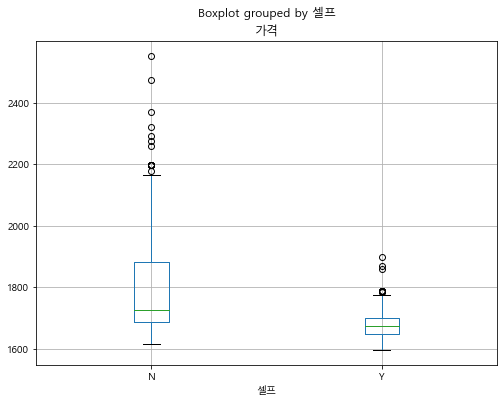

In [75]:
# boxplot(feat. pandas)

stations.boxplot(column='가격', by='셀프', figsize=(8,6));

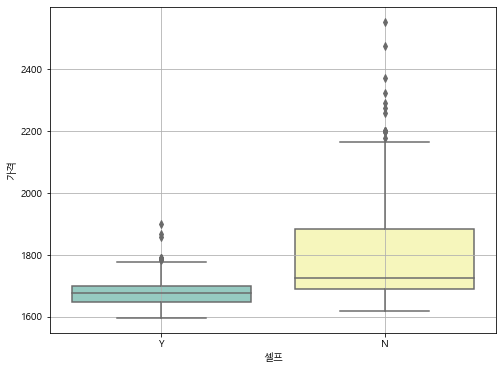

In [76]:
# boxplot(feat. seaborn)

plt.figure(figsize=(8,6))
sns.boxplot(x='셀프', y='가격', data=stations, palette='Set3')
plt.grid()
plt.show()

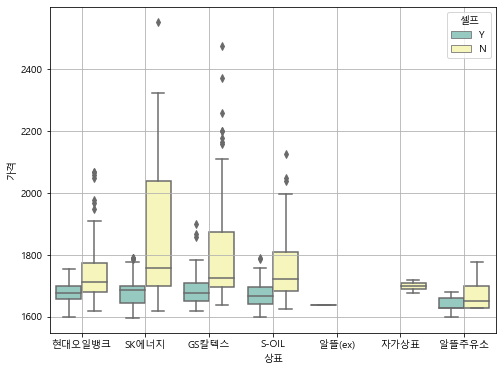

In [77]:
# boxplot(feat. seaborn)

plt.figure(figsize=(8,6))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.grid()
plt.show()

In [78]:
# 지도 시각화

In [79]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [81]:
# 가장 비싼 주유소 10개
stations.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
291,서남주유소,서울 중구 통일로 30,2552.0,N,SK에너지,중구
256,서계주유소,서울 용산구 청파로 367 (서계동),2473.0,N,GS칼텍스,용산구
290,필동주유소,서울 중구 퇴계로 196 (필동2가),2369.0,N,GS칼텍스,중구
289,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2322.0,N,SK에너지,중구
255,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
466,뉴서울(강남),서울 강남구 언주로 716,2275.0,N,SK에너지,강남구
288,약수주유소,서울 중구 다산로 173,2258.0,N,GS칼텍스,중구
15,강동주유소,서울 강동구 양재대로 1509 (길동),2198.0,N,SK에너지,강동구
253,한남지점,서울 용산구 한남대로21길 4 (한남동),2198.0,N,SK에너지,용산구
389,구로주유소,서울 구로구 구로동로 137 (구로동),2198.0,N,GS칼텍스,구로구


In [82]:
# 가장 값싼 주유소 10개
stations.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
16,동서울고속주유소,서울 동대문구 한천로 414,1595.0,Y,SK에너지,동대문구
204,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1598.0,Y,SK에너지,영등포구
205,도림주유소,서울 영등포구 도림로 343 (도림동),1598.0,Y,알뜰주유소,영등포구
206,영등포제일셀프주유소,서울 영등포구 가마산로 379,1598.0,Y,현대오일뱅크,영등포구
207,성락주유소,서울 영등포구 가마산로 414 (신길동),1598.0,Y,S-OIL,영등포구
148,송파알찬주유소,서울 송파구 백제고분로 229 (삼전동),1610.0,Y,S-OIL,송파구
179,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1612.0,Y,SK에너지,양천구
401,화랑대주유소,서울 노원구 화랑로 483,1615.0,Y,현대오일뱅크,노원구
181,형산석유(주)원주유소,서울 양천구 남부순환로 408,1617.0,N,현대오일뱅크,양천구
182,현대주유소,서울 양천구 남부순환로 372 (신월동),1617.0,Y,S-OIL,양천구


In [84]:
import numpy as np

gu_data = pd.pivot_table(data=stations, index='구', values='가격', aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1881.771429
강동구,1779.375000
강북구,1644.000000
강서구,1693.718750
관악구,1724.800000


In [88]:
geo_path = '../data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    key_on='feature.id',
    fill_color='PuRd'

)
my_map